# Heart Attack in Indonesia

[Dashboard Tableau](https://public.tableau.com/views/Book1_17393594873850/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)



## Identification of problems



### Background
Heart disease is one of the leading causes of death in Indonesia, affecting various age groups, both young and old. Analysis of differences in heart attack characteristics between young and old age groups can provide important insights for more effective prevention and treatment. <br><br>
As an analyst at the Ministry of Health of the Republic of Indonesia, this analysis was conducted to see the dominant factors that influence the incidence of heart attacks with the aim of making stakeholder policies in the Ministry of Health more targeted.

### Problem Statement
<br><br>
Using SMART framework<br>
Specific : Analyze and compare risk factors for heart attacks.<br>
Measurable : Reduce the number of heart attacks in Indonesia by 5%.<br>
Achieveable : Create health education and campaign programs and regulate policies regarding cigarettes and fast food.<br>
Relevant : Support the vision of Healthy Indonesia 2025 in reducing the number of non-communicable diseases.<br>
Time-bound : Reduce the number of heart attacks in Indonesia by 5% in a year<br><br>

Problem statement:<br>
Analyze the dominant factors of heart attacks which aim to reduce the number of heart attacks in Indonesia by 5% in a year in order to achieve the vision of Healthy Indonesia 2025 by creating national health programs and campaigns

To answer this analysis, the questions needed are:<br>
1. What are the dominant factors that cause heart attacks?
2. Why do these dominant factors cause heart attacks?
3. Who is more likely to have heart attacks?
4. At what age do heart attacks occur most often?
5. Where do heart attacks often occur?

In [ ]:
# import libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## 1. Data Loading

In [ ]:
# load data
url = "https://raw.githubusercontent.com/wahyughifari/Heart-Attack-in-Indonesia/refs/heads/main/data_heart_attack_indonesia.csv"

df = pd.read_csv(url)

# Menampilkan full kolom
pd.options.display.max_columns = None

df

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,No,NaN,Unhealthy,Active,Moderate,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,Yes,Rarely,Balanced,Sedentary,Moderate,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,No,NaN,Balanced,Active,Low,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,No,Rarely,Unhealthy,Sedentary,Low,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,No,NaN,Balanced,Active,Low,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170496,170497,Semarang,23,No,Male,295,Smoker,High,33.6,No,No,Rarely,Balanced,Sedentary,Low,Higher,Married,Yes,High,Good,7.6,Rural,52,Moderate,Employed
170497,170498,Malang,25,Yes,Male,172,Non-smoker,Moderate,20.1,Yes,No,Often,Balanced,Sedentary,Low,Higher,Married,No,High,Poor,4.5,Rural,248,Low,Employed
170498,170499,Pekanbaru,64,No,Male,209,Smoker,Moderate,19.4,No,No,NaN,Unhealthy,Sedentary,Moderate,Primary,Married,No,Middle,Good,9.0,Rural,273,Moderate,Employed
170499,170500,Bandung,57,No,Male,150,Smoker,High,29.4,No,No,Rarely,Balanced,Active,Moderate,Primary,Single,No,Low,Average,6.4,Rural,207,Low,Employed


## 2. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170501 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         170501 non-null  int64  
 1   State                      170501 non-null  object 
 2   Age                        170501 non-null  int64  
 3   HeartAttack                170501 non-null  object 
 4   Gender                     170501 non-null  object 
 5   Cholesterol                170501 non-null  int64  
 6   SmokingHabits              170501 non-null  object 
 7   PhysicalActivity           170501 non-null  object 
 8   BMI                        170501 non-null  float64
 9   Hypertension               170501 non-null  object 
 10  Diabetes                   170501 non-null  object 
 11  AlcoholConsumption         113873 non-null  object 
 12  DietType                   170501 non-null  object 
 13  OccupationType             17

In [ ]:
df.columns

Index(['ID', 'State', 'Age', 'HeartAttack', 'Gender', 'Cholesterol',
       'SmokingHabits', 'PhysicalActivity', 'BMI', 'Hypertension', 'Diabetes',
       'AlcoholConsumption', 'DietType', 'OccupationType', 'StressLevel',
       'EducationLevel', 'MaritalStatus', 'FamilyHistoryHeartDisease',
       'IncomeLevel', 'HealthcareAccess', 'SleepHours', 'UrbanOrRural',
       'AirQualityIndex', 'PollutionLevel', 'EmploymentStatus'],
      dtype='object')

In [ ]:
# Menampilkan nila unique kolom
df['AlcoholConsumption'].unique()


array([nan, 'Rarely', 'Often'], dtype=object)

In [ ]:
df['AlcoholConsumption'].value_counts().reset_index()

,AlcoholConsumption,count
0,Often,57170
1,Rarely,56703


In [ ]:
# Melihat jumlah missing value
df['AlcoholConsumption'].isnull().sum()

56628

In [ ]:
df['AlcoholConsumption'] = df['AlcoholConsumption'].fillna(df['AlcoholConsumption'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170501 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         170501 non-null  int64  
 1   State                      170501 non-null  object 
 2   Age                        170501 non-null  int64  
 3   HeartAttack                170501 non-null  object 
 4   Gender                     170501 non-null  object 
 5   Cholesterol                170501 non-null  int64  
 6   SmokingHabits              170501 non-null  object 
 7   PhysicalActivity           170501 non-null  object 
 8   BMI                        170501 non-null  float64
 9   Hypertension               170501 non-null  object 
 10  Diabetes                   170501 non-null  object 
 11  AlcoholConsumption         170501 non-null  object 
 12  DietType                   170501 non-null  object 
 13  OccupationType             17

In [ ]:
# jumöah missing value berkurang
alko_clean = df['AlcoholConsumption'].isnull().sum()
alko_clean

0

In [ ]:
df.to_csv('data_heart_attack_indonesia_clean.csv', index=False)

## Analysis

### What are the dominant factors that cause heart attacks?

To answer this question, two tests will be conducted, namely the Chi-Square test and the T-test. <br>
The Chi-Square test is conducted to analyze the HeartAttack variable (categorical) with other categorical variables. While the T-test is conducted to analyze the HeartAttack variable with numeric variables.

Chi-Square<br><br>
H0: There is no relationship between variable X and the incidence of heart attacks.<br>
H1: There is a relationship between variable X and the incidence of heart attacks.<br><br>
This analysis uses a level of confidence of 95% which means: <br><br>
If p-value < 0.05 → Reject H0 → The variable has a relationship with the incidence of heart attacks (there is an effect).<br>
If p-value ≥ 0.05 → Fail to reject H0 → The variable has no relationship with heart attacks (no significant effect).

In [ ]:
# Memilih semua kolom kategorikal, kecuali 'HeartAttack' sebagai target
cols = df.select_dtypes(include=['object']).drop(columns=['HeartAttack']).columns

# Loop untuk melakukan uji Chi-Square pada setiap variabel kategorikal terhadap Heart Attack
for col in cols:
    cross = pd.crosstab(df[col], df['HeartAttack'])
    pval = stats.chi2_contingency(cross)[1]
    prompt = "and they are dependent" if pval < 0.05 else "and they are independent"
    print(f"P-value of {col} and HeartAttack: {pval:.5f} {prompt}")


P-value of State and HeartAttack: 0.73328 and they are independent
P-value of Gender and HeartAttack: 0.40925 and they are independent
P-value of SmokingHabits and HeartAttack: 0.79781 and they are independent
P-value of PhysicalActivity and HeartAttack: 0.39709 and they are independent
P-value of Hypertension and HeartAttack: 0.76409 and they are independent
P-value of Diabetes and HeartAttack: 0.05449 and they are independent
P-value of AlcoholConsumption and HeartAttack: 0.99806 and they are independent
P-value of DietType and HeartAttack: 0.21163 and they are independent
P-value of OccupationType and HeartAttack: 0.49564 and they are independent
P-value of StressLevel and HeartAttack: 0.74595 and they are independent
P-value of EducationLevel and HeartAttack: 0.94600 and they are independent
P-value of MaritalStatus and HeartAttack: 0.51780 and they are independent
P-value of FamilyHistoryHeartDisease and HeartAttack: 0.29744 and they are independent
P-value of IncomeLevel and Hear

From the results of the Chi-Square test above, it shows that all variables * (State, Gender, Smoking Habits, Physical Activity, Hypertension, Diabetes, Alcohol Consumption, Diet Type, Occupation Type, Stress Level, Education Level, Marital Status, Family History Heart Disease, Income Level, Healthcare Access, Urban Or Rural, Pollution Level and Employment Status) * have no relationship with heart attacks.

This can be seen from the p-value > 0.05

T-test<br><br>
H0: There is no significant difference in the distribution of variable values ​​between the group that had a heart attack and those that did not have a heart attack<br>
H1: There is a significant difference in the distribution of variable values ​​between the group that had a heart attack and those that did not have a heart attack<br><br>
This analysis uses a level of confidence of 95% which means:<br>
If the p-value ≥ 0.05, we fail to reject H₀, meaning that there is no significant difference between people who have a heart attack and those who do not have a heart attack.<br>
If the p-value < 0.05, we reject H₀ and accept H₁, meaning that there is a significant difference between people who have a heart attack and those who do not have a heart attack.

In [ ]:
# Memiisahkan antara yang terkena serangan jantung dan yang tidak
heart_yes = df[df['HeartAttack'] == 'Yes']
heart_no = df[df['HeartAttack'] == 'No']

# Loop untuk melakukan T-Test pada setiap variabel numerik
numeric_cols = ['Cholesterol', 'BMI', 'Age', 'SleepHours', 'AirQualityIndex']

for col in numeric_cols:
    t_stat, p_value = stats.ttest_ind(heart_yes[col], heart_no[col], equal_var=False)
    result = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"P-value for {col}: {p_value:.5f} ({result})")


P-value for Cholesterol: 0.03409 (Significant)
P-value for BMI: 0.49422 (Not Significant)
P-value for Age: 0.17542 (Not Significant)
P-value for SleepHours: 0.27643 (Not Significant)
P-value for AirQualityIndex: 0.18128 (Not Significant)


From the results of the T-test test above, it shows that the variables *(BMI, Age, SleepHours and AirQualityIndex)* do not have significant values ​​between people who have heart attacks and those who do not have heart attacks. <br>
However, the variable *Cholesterol* has a significant value between people who have heart attacks and those who do not have heart attacks. <br>
This can be seen from the p-value of the variable *Cholesterol* <0.05. <br><br>
Which means that *Cholesterol* is the dominant factor in the occurrence of heart attacks based on the results of inferential statistics.

### Why do these dominant factors cause heart attacks?

To see in more detail why *Cholesterol* is the dominant factor in heart attacks, it is necessary to conduct descriptive statistical analysis.

In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok (nilai rata-rata)
mean_desc_stats = df.groupby('HeartAttack')['Cholesterol'].mean().reset_index()
print(mean_desc_stats)

  HeartAttack  Cholesterol
0          No   224.396922
1         Yes   224.908776


In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok (nilai tengah)
median_desc_stats = df.groupby('HeartAttack')['Cholesterol'].median().reset_index()
print(median_desc_stats)

  HeartAttack  Cholesterol
0          No        224.0
1         Yes        225.0


In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok
std_desc_stats = df.groupby('HeartAttack')['Cholesterol'].std().reset_index()
print(std_desc_stats)

  HeartAttack  Cholesterol
0          No    43.242679
1         Yes    43.193310


In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok (Q1 dan Q3)
q1_desc_stats = df.groupby('HeartAttack')['Cholesterol'].quantile(0.25).reset_index()
q3_desc_stats = df.groupby('HeartAttack')['Cholesterol'].quantile(0.75).reset_index()


print(f'nilai Q1: {q1_desc_stats}')
print(f'nilai Q3 {q3_desc_stats}')


nilai Q1:   HeartAttack  Cholesterol
0          No        187.0
1         Yes        188.0
nilai Q3   HeartAttack  Cholesterol
0          No        262.0
1         Yes        262.0


In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok (IQR)
iqr_desc_stats = q3_desc_stats.copy()
iqr_desc_stats['IQR'] = q3_desc_stats['Cholesterol'] - q1_desc_stats['Cholesterol']
iqr_desc_stats = iqr_desc_stats[['HeartAttack', 'IQR']]

iqr_desc_stats.set_index('HeartAttack', inplace=True)
print(f'niali IQR {iqr_desc_stats}')

niali IQR               IQR
HeartAttack      
No           75.0
Yes          74.0


In [ ]:
# Hitung statistik deskriptif Cholesterol untuk kedua kelompok (secara menyeluruh)
median_desc_stats = df.groupby('HeartAttack')['Cholesterol'].describe().reset_index()
print(median_desc_stats)

  HeartAttack     count        mean        std    min    25%    50%    75%  \
0          No  127826.0  224.396922  43.242679  150.0  187.0  224.0  262.0   
1         Yes   42675.0  224.908776  43.193310  150.0  188.0  225.0  262.0   

     max  
0  299.0  
1  299.0  


In [ ]:
x = df.groupby('HeartAttack')['Cholesterol'].count().reset_index()
x

,HeartAttack,Cholesterol
0,No,127826
1,Yes,42675


From the results of the analysis with descriptive statistics, the following values ​​are produced:
The difference in mean value, mean value, standard deviation and IQR between people who have heart attacks caused by *Cholesterol* and those who do not have heart attacks are relatively almost the same. <br>
This means that based on descriptive statistical data, *Cholesterol* should not be the cause of heart attacks. <br>
Ideally, the mean value, mean value, standard deviation and IQR of those who have heart attacks are higher than those who do not have heart attacks.

<ipython-input-201-43be8a425777>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartAttack', y='Cholesterol', palette='coolwarm')


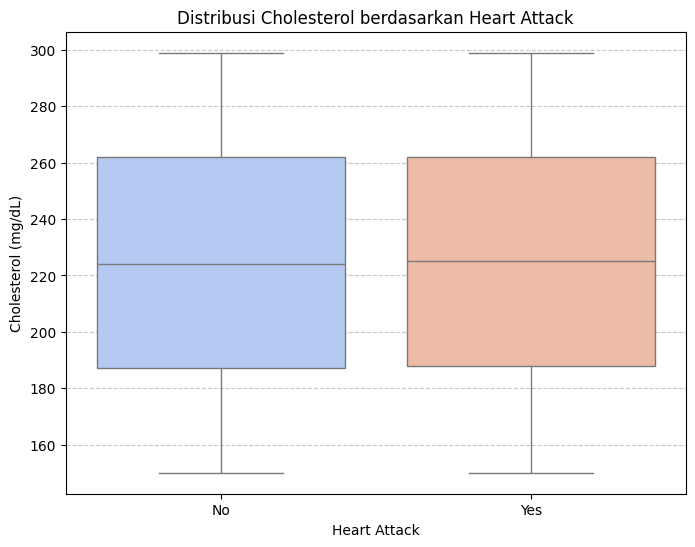

In [ ]:
# Melihat distribusi dengan Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='HeartAttack', y='Cholesterol', palette='coolwarm')

plt.title('Distribusi Cholesterol berdasarkan Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol (mg/dL)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
df['HeartAttack'].value_counts().reset_index()

,HeartAttack,count
0,No,127826
1,Yes,42675


Due to the difference in results between inferential statistics and descriptive statistics, it is necessary to see with a boxplot whether there are any outliers. The results of the boxplot show that the data is normal and there are no outliers. <br>
Furthermore, because the results of the boxpolot are the same, it is necessary to see the total value of *HeartAttack* and the results are very different. <br><br>
This data has 127,826 people who did not have a heart attack and 42,675 people who did have a heart attack. The difference between those who had a heart attack and those who did not have a heart attack is more than 2x. <br><br>
This very large difference in sample size is what causes inferential statistics and descriptive statistics to differ

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### 3. Who is more likely to have heart attacks?

In [ ]:
# Jumlah serangan jantung pada pria
pria = df[(df['Gender'] == 'Male') & (df['HeartAttack'] == 'Yes')].groupby('Age')['HeartAttack'].size().sum()
print('Jumlah pria yang terkena serangan jantung :', pria)

Jumlah pria yang terkena serangan jantung : 21261


In [ ]:
# Jumlah serangan jantung pada wanita
wanita = df[(df['Gender'] == 'Female') & (df['HeartAttack'] == 'Yes')].groupby('Age')['HeartAttack'].size().sum()
print('Jumlah wanita yang terkena serangan jantung :', wanita)

Jumlah wanita yang terkena serangan jantung : 21414


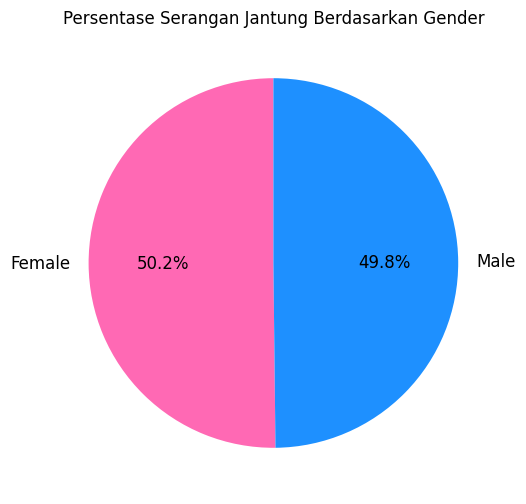

In [ ]:
labels = ['Female', 'Male']
values = [wanita, pria]

# Membuat pie chart
plt.figure(figsize=(6, 6))
colors = ['#FF69B4', '#1E90FF']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})

plt.title('Persentase Serangan Jantung Berdasarkan Gender')
plt.show()


The data above shows that heart attacks occur more frequently in women at 50.2% while in men at 49.8%.

### 4. At what age do heart attacks occur most often?

To answer this question, the age group will be divided into 2 groups, namely <br>
1. young age group from 15 - 39 years old
2. old age group from 40 -64 years old

In [ ]:
# Menampilkan jumlah serangan jantung per usia
usia_heart = df[df['HeartAttack'] == 'Yes'].groupby('Age')['HeartAttack'].size().reset_index(name='jumlah').sort_values(by='Age', ascending=False)
usia_heart

,Age,jumlah
49,64,857
48,63,880
47,62,801
46,61,848
45,60,855
44,59,849
43,58,809
42,57,927
41,56,831
40,55,886


In [ ]:
# Menampilkan jumlah serangan jantung di kelompok usia muda
usia_muda = df[(df['Age'] <= 39) & (df['HeartAttack'] == 'Yes')].groupby('Age')['HeartAttack'].size().reset_index(name='jumlah').sort_values(by='Age', ascending=False)
usia_muda

,Age,jumlah
24,39,911
23,38,866
22,37,852
21,36,829
20,35,831
19,34,845
18,33,826
17,32,881
16,31,881
15,30,859


In [ ]:
# Menampilkan jumlah serangan jantung di kelompok usia tua
usia_tua = df[(df['Age'] >= 40) & (df['HeartAttack'] == 'Yes')].groupby('Age')['HeartAttack'].size().reset_index(name='jumlah').sort_values(by='Age', ascending=False)
usia_tua

,Age,jumlah
24,64,857
23,63,880
22,62,801
21,61,848
20,60,855
19,59,849
18,58,809
17,57,927
16,56,831
15,55,886


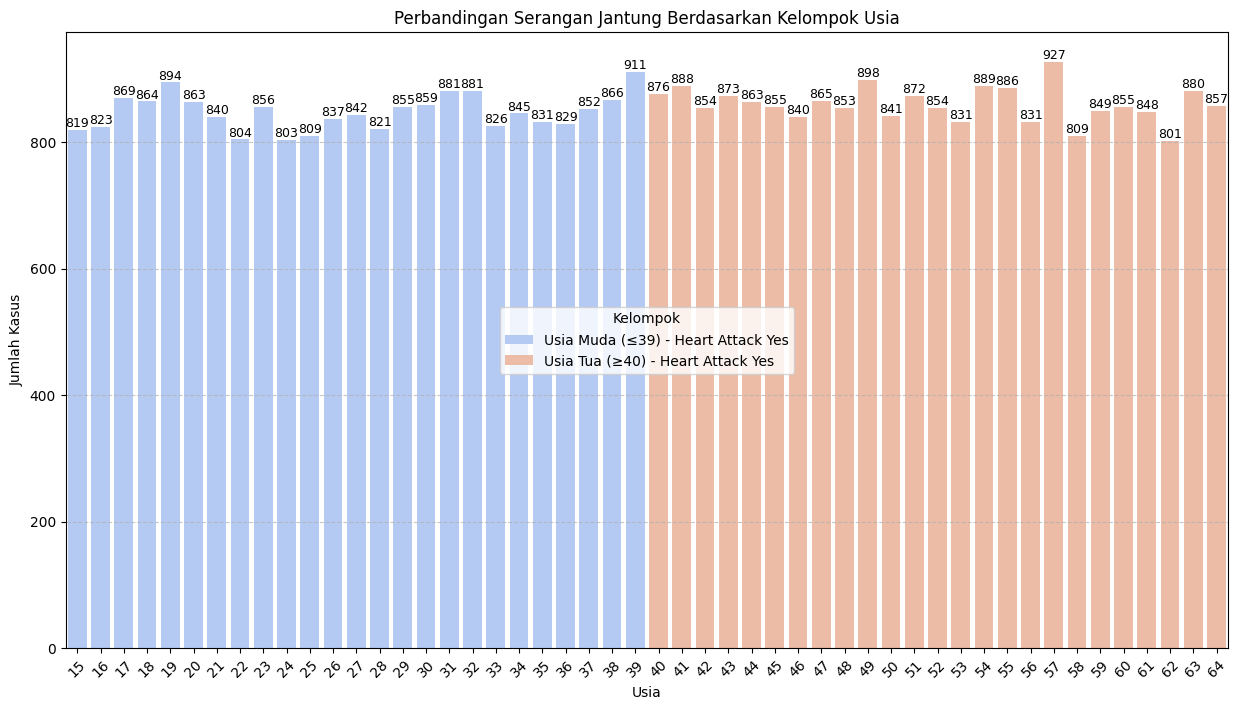

In [ ]:
plt.figure(figsize=(15, 8))


usia_muda['Kelompok'] = 'Usia Muda (≤39) - Heart Attack Yes'
usia_tua['Kelompok'] = 'Usia Tua (≥40) - Heart Attack Yes'
df_combined = pd.concat([usia_muda, usia_tua])

# Memmbuat bar plot
ax = sns.barplot(data=df_combined, x='Age', y='jumlah', hue='Kelompok',palette='coolwarm')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9)


plt.xticks(rotation=45)
plt.title('Perbandingan Serangan Jantung Berdasarkan Kelompok Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Kelompok', fontsize=10, title_fontsize=10, loc='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


Overall there is not much difference in the number of heart attack cases in the young and old age groups. <br>
In the young age group, the fewest cases of heart attacks occurred at the age of 24 with 803 cases and the most at the age of 39 with 911 cases. <br>
While in the old age group, the fewest cases occurred at the age of 62 with 801 cases and the most at the age of 57 with 927 cases. <br>
Interestingly, the fewest cases in all groups were at the age of 62 and the age group 17 - 20 years had quite high cases.

### 4. Where do heart attacks often occur?

In [ ]:
# Melihat serangan jantung di tiap kota
heart_city = df[df['HeartAttack'] == 'Yes'].groupby('State')['HeartAttack'].size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
heart_city

,State,jumlah
10,Pekanbaru,2944
14,Yogyakarta,2907
8,Medan,2897
12,Semarang,2867
1,Balikpapan,2862
13,Surabaya,2858
6,Makassar,2855
2,Bandung,2852
9,Palembang,2840
11,Pontianak,2834


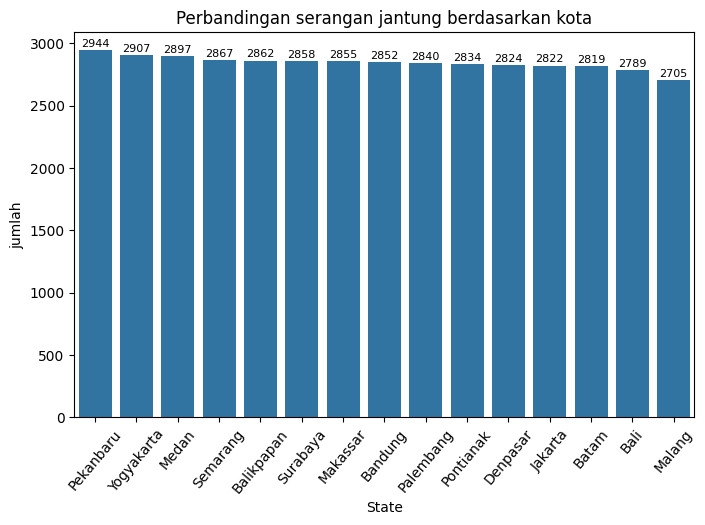

In [ ]:
plt.figure(figsize=(8,5))


ax=sns.barplot(data=heart_city, x='State', y='jumlah')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=1)


plt.xticks(rotation=50)
plt.title('Perbandingan serangan jantung berdasarkan kota')

plt.show()

From the data above shows that the most cases of heart attacks occurred in Pekanbaru city as many as 2944 cases. Furthermore, at least there were more than 2700 cases of heart attacks in each city.

### Additional information: Non-dominant factors with heart attacks

In [ ]:
# Membandingkan serangan jantung dan waktu tidur
jam_tidur = df.groupby('HeartAttack')['SleepHours'].mean().reset_index()
jam_tidur

,HeartAttack,SleepHours
0,No,6.505675
1,Yes,6.496900


<ipython-input-214-e00607113e08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=jam_tidur, x='HeartAttack', y='SleepHours', palette="coolwarm")


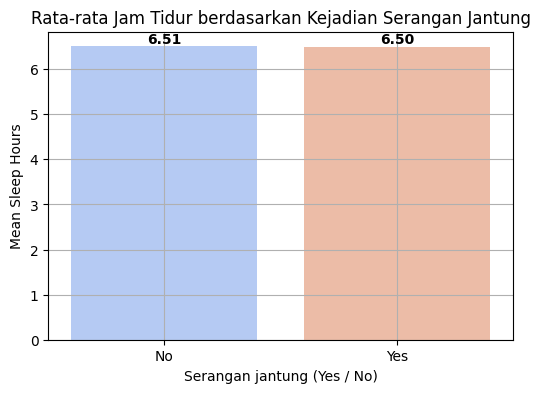

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=jam_tidur, x='HeartAttack', y='SleepHours', palette="coolwarm")


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,  # Posisi X (tengah batang)
            p.get_height(),  # Posisi Y (di atas batang)
            f'{p.get_height():.2f}',  # Format angka (2 desimal)
            ha='center',  # Pusatkan teks
            va='bottom',  # Letakkan teks di atas batang
            fontsize=10,
            fontweight='bold')


plt.title("Rata-rata Jam Tidur berdasarkan Kejadian Serangan Jantung")
plt.xlabel("Serangan jantung (Yes / No)")
plt.ylabel("Mean Sleep Hours")
plt.grid()
plt.show()

The data above shows that the average hours of sleep between people who have heart attacks and those who have not. The results are not much different where the average person who does not have a heart attack sleeps for 6.51 hours while those who have a heart attack sleep for 6.5 hours.

In [ ]:
df_yes = df[df['HeartAttack'] == 'Yes']

rokok = df_yes['SmokingHabits'].value_counts().reset_index()
rokok

,SmokingHabits,count
0,Smoker,21345
1,Non-smoker,21330


<ipython-input-216-100c1b3c1245>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_yes, x='SmokingHabits', palette='coolwarm', order=df_yes['SmokingHabits'].value_counts().index)


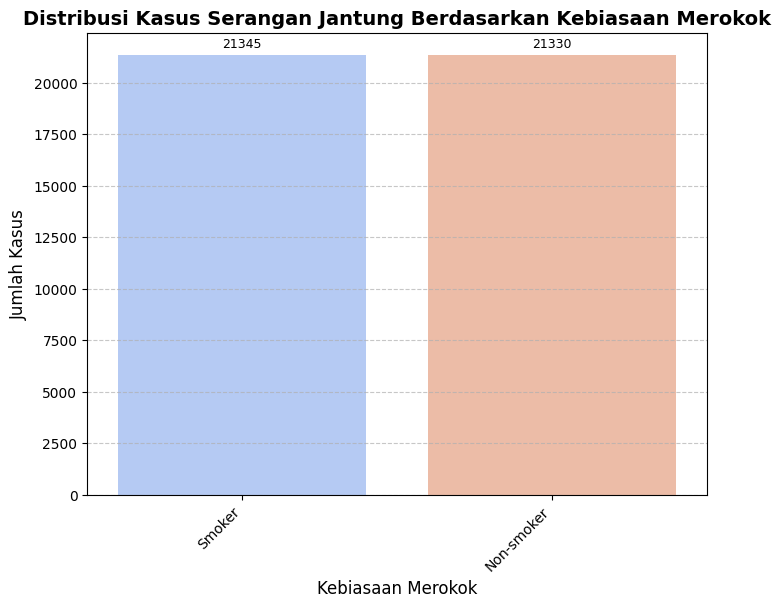

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_yes, x='SmokingHabits', palette='coolwarm', order=df_yes['SmokingHabits'].value_counts().index)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, padding=3)

plt.title('Distribusi Kasus Serangan Jantung Berdasarkan Kebiasaan Merokok', fontsize=14, fontweight='bold')
plt.xlabel('Kebiasaan Merokok', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From the data above shows the number of smokers who had heart attacks and those who did not have heart attacks. The result is that more cases of heart attacks occurred in smokers as many as 21,345 cases but the difference with non-smokers is not too big as many as 21,330 cases.

In [ ]:
diabetes = df_yes['Diabetes'].value_counts().reset_index()
diabetes

,Diabetes,count
0,No,36375
1,Yes,6300


<ipython-input-218-59d02a73cf97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_yes, x='Diabetes', palette='coolwarm', order=df_yes['Diabetes'].value_counts().index)


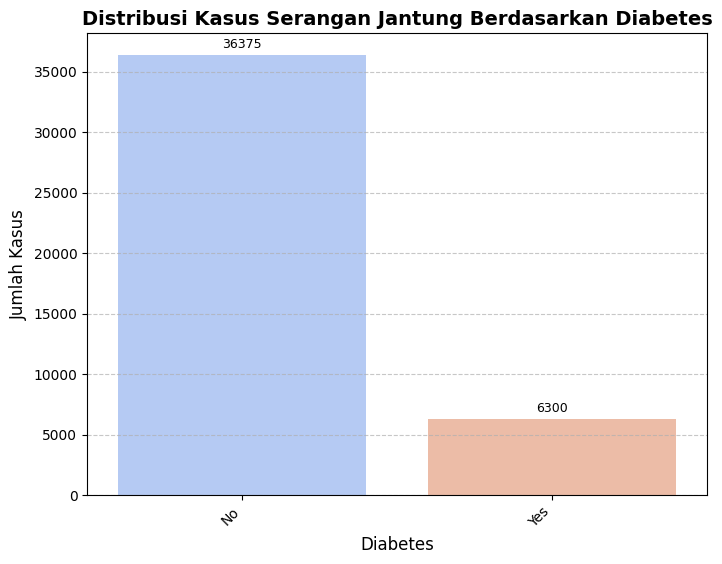

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_yes, x='Diabetes', palette='coolwarm', order=df_yes['Diabetes'].value_counts().index)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, padding=3)

plt.title('Distribusi Kasus Serangan Jantung Berdasarkan Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Data di atas menampilkan kasus serangan jantung lebih banyak terjadi pada orang yang tidak diabestes daripada yang terkena diabetes. Sebanyak 36,375 kasus terjadi pada orang yang tidak memliki diabetes dan sebesar 6,300 kasus terjadi pada yang memiliki diabetes.

Although the above data based on the data presented are non-dominant factors, the fact is that these factors can cause or increase the potential for heart attacks. Here are some articles stating that the above factors can be the cause of heart attacks.
<br><br>
Relationship between sleep duration and heart attacks: [Study Finds People With Insomnia Nearly 70% More at Risk for a Heart Attack](https://www.healthline.com/health-news/study-finds-people-with-insomnia-nearly-70-more-at-risk-for-a-heart-attack) <br><br>

The relationship between smoking and heart attacks: [Understand how smoking can impact your heart health.](https://www.heartfoundation.org.au/your-heart/smoking-and-your-heart)<br><br>

The relationship between diabetes and heart attacks: [Diabetes and Your Heart](https://www.cdc.gov/diabetes/diabetes-complications/diabetes-and-your-heart.html#:~:text=People%20with%20diabetes%20are%20at,your%20risk%20for%20heart%20disease.)

## Conclusion

Based on the analysis that has been done, it was found that the dominant factor causing heart attacks is *Cholesterol* based on statistical data results. So that stakeholders of the Ministry of Health of the Republic of Indonesia can create a program that focuses on reducing cholesterol levels that have the potential to reduce cases of heart attacks in Indonesia.<br><br>
Furthermore, most cases of heart attacks occur in women and most cases of heart attacks occur in Pekanbaru. This could be the main target of the Ministry of Health of the Republic of Indonesia in reducing heart attacks. And the distribution of heart attack cases is quite diverse based on age, but if you choose a certain age group, the main target is the 57 and 39 year age groups where the most cases occur in that group. A total of 927 cases occurred in the 57 year age group and 911 cases occurred in the 39 year age group.
<br><br>
However, based on descriptive statistics, it shows that *Cholesterol* is not the dominant factor in heart attacks. From the descriptive statistical data, it shows that people who have heart attacks and those who are not affected have almost the same *Cholesterol* values, which should not be possible because ideally people who have heart attacks have higher *Cholesterol* values ​​than those who are not affected by heart attacks. <br><br>
When explored further, this occurs because there is a very large difference in the samples taken where the samples that are not affected by heart attacks are twice as many as the samples that are affected by heart attacks. <br><br>
Suggestion: In several factors such as sleep time, diabetes and smoking habits which from the results of statistical data are not dominant factors, but in reality several articles state that these factors can increase the risk of heart attacks. Therefore, it is necessary to carry out normalization or re-sampling so that the results are more precise so that the decisions taken are more targeted.